In [2]:
# run in computer environment gis3
import xarray as xr
import numpy as np
from xarray.backends import NetCDF4DataStore
import salem
from datetime import datetime
from siphon.catalog import TDSCatalog
import cartopy.crs as ccrs
import cartopy.feature as cfeat
from cartopy.mpl.ticker import LongitudeFormatter,LatitudeFormatter
from cartopy.io.shapereader import Reader, natural_earth
import matplotlib.pyplot as plt
import matplotlib.ticker as mticker
import geopandas

In [3]:
import salem

In [4]:
ds = salem.open_wrf_dataset('/mnt/e/wrf_tibet/test/3.17/control/geo_em.d01.nc')

In [5]:
import pyproj
wrf_proj = pyproj.Proj(proj='lcc', # projection type: Lambert Conformal Conic
                       lat_1=ds.TRUELAT1, lat_2=ds.TRUELAT2, # Cone intersects with the sphere
                       lat_0=ds.MOAD_CEN_LAT, lon_0=ds.STAND_LON, # Center point
                       a=6370000, b=6370000) # This is it! The Earth is a perfect sphere

In [6]:
wgs_proj = pyproj.Proj(proj='latlong', datum='WGS84')
e, n = pyproj.transform(wgs_proj, wrf_proj, ds.CEN_LON, ds.CEN_LAT)
# Grid parameters
dx, dy = ds.DX, ds.DY
nx, ny = ds.dims['west_east'], ds.dims['south_north']
# Down left corner of the domain
x0 = -(nx-1) / 2. * dx + e
y0 = -(ny-1) / 2. * dy + n
# 2d grid
xx, yy = np.meshgrid(np.arange(nx) * dx + x0, np.arange(ny) * dy + y0)

<ipython-input-6-ad84b503d7ab>:2: DeprecationWarning: This function is deprecated. See: https://pyproj4.github.io/pyproj/stable/gotchas.html#upgrading-to-pyproj-2-from-pyproj-1
  e, n = pyproj.transform(wgs_proj, wrf_proj, ds.CEN_LON, ds.CEN_LAT)


<ipython-input-7-bfde34aaf880>:1: DeprecationWarning: This function is deprecated. See: https://pyproj4.github.io/pyproj/stable/gotchas.html#upgrading-to-pyproj-2-from-pyproj-1
  our_lons, our_lats = pyproj.transform(wrf_proj, wgs_proj, xx, yy)


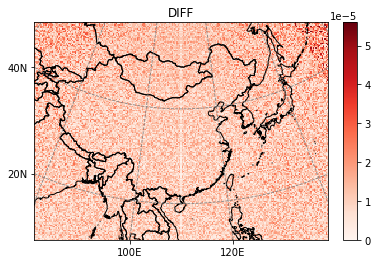

In [7]:
our_lons, our_lats = pyproj.transform(wrf_proj, wgs_proj, xx, yy)
ds['DIFF'] = np.sqrt((our_lons - ds.XLONG_M)**2 + (our_lats - ds.XLAT_M)**2)
ds.salem.quick_map('DIFF', cmap='Reds');

In [25]:
our_lons

array([[ 82.61050418,  82.83073978,  83.05140384, ..., 136.94859616,
        137.16926022, 137.38949582],
       [ 82.53194676,  82.75271303,  82.97391117, ..., 137.02608883,
        137.24728697, 137.46805324],
       [ 82.45295539,  82.67425441,  82.89598874, ..., 137.10401126,
        137.32574559, 137.54704461],
       ...,
       [ 58.88326878,  59.21749359,  59.55378354, ..., 160.44621646,
        160.78250641, 161.11673122],
       [ 58.6349877 ,  58.96984232,  59.30678345, ..., 160.69321655,
        161.03015768, 161.3650123 ],
       [ 58.3846278 ,  58.72010451,  59.05768929, ..., 160.94231071,
        161.27989549, 161.6153722 ]])

In [19]:
nc=xr.open_dataset('/mnt/e/wrf_tibet/test/3.17/control/geo_em.d01.nc')

In [22]:
nc

<xarray.Dataset>
Dimensions:     (Time: 1, land_cat: 21, month: 12, soil_cat: 16, south_north: 171, south_north_stag: 172, west_east: 231, west_east_stag: 232)
Dimensions without coordinates: Time, land_cat, month, soil_cat, south_north, south_north_stag, west_east, west_east_stag
Data variables:
    Times       (Time) |S19 b'0000-00-00_00:00:00'
    XLAT_M      (Time, south_north, west_east) float32 8.361839 ... 48.142765
    XLONG_M     (Time, south_north, west_east) float32 82.610504 ... 161.61536
    XLAT_V      (Time, south_north_stag, west_east) float32 8.253052 ... 48.2...
    XLONG_V     (Time, south_north_stag, west_east) float32 82.64963 ... 161....
    XLAT_U      (Time, south_north, west_east_stag) float32 8.323021 ... 48.0...
    XLONG_U     (Time, south_north, west_east_stag) float32 82.50055 ... 161....
    CLAT        (Time, south_north, west_east) float32 8.361839 ... 48.142765
    CLONG       (Time, south_north, west_east) float32 82.610504 ... 161.61536
    MAPFAC_M    (Time, south_north, west_east) float32 1.1677841 ... 0.96654695
    MAPFAC_V    (Time, south_north_stag, west_east) float32 1.1690645 ... 0.9...
    MAPFAC_U    (Time, south_north, west_east_stag) float32 1.1682404 ... 0.9...
    MAPFAC_MX   (Time, south_north, west_east) float32 1.1677841 ... 0.96654695
    MAPFAC_VX   (Time, south_north_stag, west_east) float32 1.1690645 ... 0.9...
    MAPFAC_UX   (Time, south_north, west_east_stag) float32 1.1682404 ... 0.9...
    MAPFAC_MY   (Time, south_north, west_east) float32 1.1677841 ... 0.96654695
    MAPFAC_VY   (Time, south_north_stag, west_east) float32 1.1690645 ... 0.9...
    MAPFAC_UY   (Time, south_north, west_east_stag) float32 1.1682404 ... 0.9...
    E           (Time, south_north, west_east) float32 0.00014428963 ... 9.73...
    F           (Time, south_north, west_east) float32 2.1208652e-05 ... 0.00...
    SINALPHA    (Time, south_north, west_east) float32 0.33542916 ... -0.6008945
    COSALPHA    (Time, south_north, west_east) float32 0.94206536 ... 0.7993283
    LANDMASK    (Time, south_north, west_east) float32 0.0 0.0 0.0 ... 0.0 0.0
    XLAT_C      (Time, south_north_stag, west_east_stag) float32 8.214333 ......
    XLONG_C     (Time, south_north_stag, west_east_stag) float32 82.539795 .....
    SINALPHA_U  (Time, south_north, west_east_stag) float32 0.33675826 ... -0...
    COSALPHA_U  (Time, south_north, west_east_stag) float32 0.94159114 ... 0....
    SINALPHA_V  (Time, south_north_stag, west_east) float32 0.33497563 ... -0...
    COSALPHA_V  (Time, south_north_stag, west_east) float32 0.94222677 ... 0....
    LANDUSEF    (Time, land_cat, south_north, west_east) float32 ...
    LU_INDEX    (Time, south_north, west_east) float32 17.0 17.0 ... 17.0 17.0
    HGT_M       (Time, south_north, west_east) float32 0.0 0.0 0.0 ... 0.0 0.0
    SOILTEMP    (Time, south_north, west_east) float32 0.0 0.0 0.0 ... 0.0 0.0
    SOILCTOP    (Time, soil_cat, south_north, west_east) float32 ...
    SCT_DOM     (Time, south_north, west_east) float32 14.0 14.0 ... 14.0 14.0
    SOILCBOT    (Time, soil_cat, south_north, west_east) float32 ...
    SCB_DOM     (Time, south_north, west_east) float32 14.0 14.0 ... 14.0 14.0
    ALBEDO12M   (Time, month, south_north, west_east) float32 ...
    GREENFRAC   (Time, month, south_north, west_east) float32 ...
    LAI12M      (Time, month, south_north, west_east) float32 ...
    SNOALB      (Time, south_north, west_east) float32 0.0 0.0 0.0 ... 0.0 0.0
    CON         (Time, south_north, west_east) float32 0.0 0.0 0.0 ... 0.0 0.0
    VAR         (Time, south_north, west_east) float32 0.0 0.0 0.0 ... 0.0 0.0
    OA1         (Time, south_north, west_east) float32 0.0 0.0 0.0 ... 0.0 0.0
    OA2         (Time, south_north, west_east) float32 0.0 0.0 0.0 ... 0.0 0.0
    OA3         (Time, south_north, west_east) float32 0.0 0.0 0.0 ... 0.0 0.0
    OA4         (Time, south_north, west_east) float32 0.0 0.0 0.0 ... 0.0 0.0
    OL1         (Time, south_north, west_east)

In [21]:
nc['xlong']=our_lons

MissingDimensionsError: cannot set variable 'xlong' with 2-dimensional data without explicit dimension names. Pass a tuple of (dims, data) instead.

In [44]:
import shapefile as shp
from netCDF4 import Dataset
import numpy as np
wrfoutput = '/mnt/e/wrf_tibet/test/pre_test2003summer/wrfout_tibet_2003_summer_control'
fh = Dataset(wrfoutput, mode='r')

In [45]:
fh

<class 'netCDF4._netCDF4.Dataset'>
root group (NETCDF4 data model, file format HDF5):
    TITLE:  OUTPUT FROM WRF V4.2.1 MODEL
    START_DATE: 2003-06-01_12:00:00
    SIMULATION_START_DATE: 2003-06-01_12:00:00
    WEST-EAST_GRID_DIMENSION: 232
    SOUTH-NORTH_GRID_DIMENSION: 172
    BOTTOM-TOP_GRID_DIMENSION: 33
    DX: 30000.0
    DY: 30000.0
    AERCU_OPT: 0
    AERCU_FCT: 1.0
    IDEAL_CASE: 0
    DIFF_6TH_SLOPEOPT: 0
    AUTO_LEVELS_OPT: 2
    DIFF_6TH_THRESH: 0.1
    DZBOT: 50.0
    DZSTRETCH_S: 1.3
    DZSTRETCH_U: 1.1
    SKEBS_ON: 0
    SPEC_BDY_FINAL_MU: 1
    USE_Q_DIABATIC: 0
    GRIDTYPE: C
    DIFF_OPT: 1
    KM_OPT: 4
    DAMP_OPT: 3
    DAMPCOEF: 0.2
    KHDIF: 0.0
    KVDIF: 0.0
    MP_PHYSICS: 4
    RA_LW_PHYSICS: 4
    RA_SW_PHYSICS: 4
    SF_SFCLAY_PHYSICS: 1
    SF_SURFACE_PHYSICS: 4
    BL_PBL_PHYSICS: 1
    CU_PHYSICS: 1
    SF_LAKE_PHYSICS: 0
    SURFACE_INPUT_SOURCE: 3
    SST_UPDATE: 0
    GRID_FDDA: 0
    GFDDA_INTERVAL_M: 0
    GFDDA_END_H: 0
    GRID_SFDDA: 

In [50]:
lons = fh.variables['XLONG'][0]
lats = fh.variables['XLAT'][0] #arrays are in 3D, reshape it

In [51]:
lons.shape

(171, 231)

In [52]:

lonsX0=lons.reshape((171,231)) #into 2D
lonsX=lonsX0.reshape((171*231)) #into 1D
latsX0=lats.reshape((171,231))
latsX=latsX0.reshape((171*231))
IN=np.array(range(171*231)) #an index array for point shape file

In [55]:
lonsX

masked_array(data=[ 82.610504,  82.83075 ,  83.05139 , ..., 160.94226 ,
                   161.2799  , 161.61536 ],
             mask=False,
       fill_value=1e+20,
            dtype=float32)

In [56]:
w = shp.Writer(shp.POINT)
w.field("fo","N",10)
for j,k in enumerate(lonsX):
    w.point(k,latsX[j]) #write the geometry
    w.record(IN[j])
out_file='/mnt/e/wrf_tibet/test/WRF_output.shp'

TypeError: expected str, bytes or os.PathLike object, not int